In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

train_set = pd.read_csv('./input/train.csv')
test_set = pd.read_csv('./input/test.csv')

train_set.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [318]:
# copying train_set just in case is needed later on to look at other features
orig_train = train_set.copy()

# saving it to variable just in case it will be used later on but I know is not needed to determine the survivability
passengerId = test_set["PassengerId"]

combine = [train_set, test_set]

# I know name, sex, ticket, fare, age, pclass, embarked and cabin are not binary
# Got to convert this features to binary so I can see which features are the most useful

#converting cabin to 0 if passenger doesn't have a cabin (NaN) and 1 if they do
train_set['Cabin'] = train_set["Cabin"].apply(lambda result: 0 if type(result) == float else 1)
test_set['Cabin'] = test_set["Cabin"].apply(lambda result: 0 if type(result) == float else 1)

# convert sex male = 0 and female = 1
train_set['Sex'] = train_set["Sex"].apply(lambda result: 0 if result == 'male' else 1)
test_set['Sex'] = test_set["Sex"].apply(lambda result: 0 if result == 'male' else 1)

In [319]:
train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


In [320]:
# Replace Null values in Age feature
for dataset in combine:
    avgAge = dataset['Age'].mean()
    stdAge = dataset['Age'].std()
    nullAmount = dataset['Age'].isnull().sum()
    randomNullsList = np.random.randint(avgAge - stdAge, avgAge + stdAge, size=nullAmount)
    # now we can replace null values with the random generated number in the list above and convert to int
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = randomNullsList
    dataset['Age'] = dataset['Age'].astype(int)


for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,0,S


In [321]:
# replacing Null values for common value in this case it should be 'S'
freq_port = train_set.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
    
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,0,0


In [322]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
mapTitle = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(mapTitle)
    dataset['Title'] = dataset['Title'].fillna(0)

train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,1,0,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,0,0,1


In [323]:
for dataset in combine:
    # replace null value(s) with median
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

    # standardize to 0, 1, 2, and 3 depending on the fair values
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,1,0,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,0,0,1


In [324]:
# Task 1 question 1: data preprocessing

train_set = train_set.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'SibSp'], axis = 1)
test_set  = test_set.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'SibSp'], axis = 1)

train_set.head(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Title
0,0,3,0,1,0,0,0,1
1,1,1,1,2,0,3,1,3
2,1,3,1,1,0,1,0,2
3,1,1,1,2,0,3,0,3
4,0,3,0,2,0,1,0,1


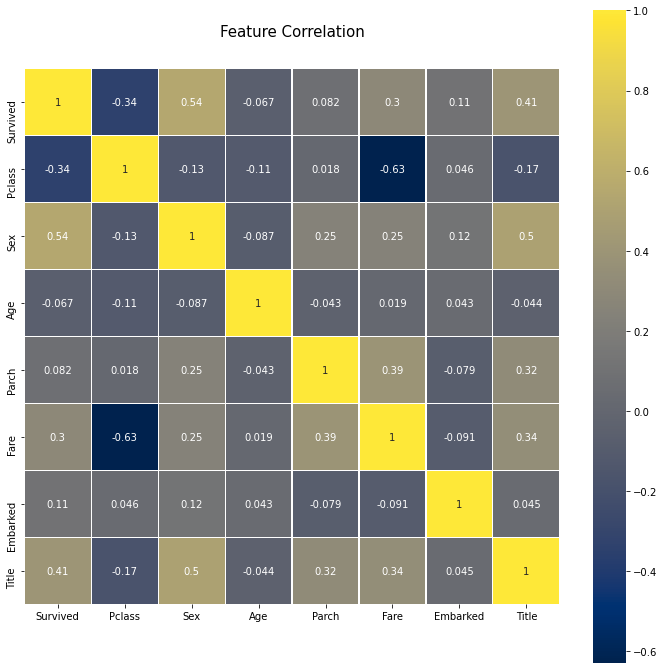

In [325]:
colormap = plt.cm.cividis
plt.figure(figsize=(12,12))
plt.title('Feature Correlation', y=1.05, size=15)
sns.heatmap(train_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [326]:
# task 1, question 2: feature selection
# we could pick Pclass and fare because they have the highest correclation but they have a lower survivability rate when compared with sex and title
# If logic is applied title might be richer since it should contain information about a person such as sex, age, among other features in it

# task 1, Q3: Gini index (coefficiency)
def impureGini(survCount, maxTotal):
    survProbability = survCount/maxTotal
    
    deathProbability = (1 - survProbability)
    
    result = (deathProbability * survProbability) + survProbability * deathProbability
    
    return result

In [327]:
train_set.describe()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,2.154882,0.381594,1.505051,0.361392,1.728395
std,0.486592,0.836071,0.477990,7.615377,0.806057,1.118148,0.635673,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,6.000000,3.000000,2.000000,5.000000


In [328]:
# taking in to consideration the mean is 38.38% survived out of 891.
# we can say approximately 342 survived with this we plot it into impureGini function
rootNode = impureGini(342, 891)
rootNode

0.47301295786144265

In [329]:
# seen if splitting by sex will reduce impurity
train_set[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
         mean count  sum
Sex                     
0    0.188908   577  109
1    0.742038   314  233

In [330]:
# then think of male vs female and we see the majority are female that survied vs male
femaleNode = impureGini(234, 314)
femaleNode

0.37973142926690745

In [331]:
# now we check for male node
maleNode = impureGini(109, 577)
maleNode

0.3064437162277843

In [332]:
# found out that splitting by sex reduces impurity now we can check if title also does the same.
# getting title vs survived first to be able to determine what to use for the function
train_set[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
           mean count  sum
Title                     
1      0.156673   517   81
2      0.702703   185  130
3      0.793651   126  100
4      0.575000    40   23
5      0.347826    23    8

In [333]:
title2Node = impureGini(130, 185)
title2Node

0.4178232286340394

In [334]:
title1Node = impureGini(81, 517)
title1Node

0.26425329886377663

In [335]:
# title also reduced impurity if split by title so now I try to find the overall decrease
# to figure out which one is better
men = 577/891
women = 314/891
giniSplitBySex = (maleNode * men) + (femaleNode * women)

giniOfSex = giniSplitBySex - rootNode
giniOfSex

-0.1407416974200953

In [336]:
title1 = 517/891
title2 = 374/891
giniSplitByTitle = (title1Node * title1) + (title2Node * title2)

giniOfTitle = giniSplitByTitle - rootNode
giniOfTitle

# now I know title works better for splitting the first node over sex

-0.14429820699533352

In [337]:
# Task 1, Q4: 5-fold cross validation with decision tree

In [341]:
#trying to display the decsision tree but having issues
trainY = train_set['Survived']
trainX = train_set.drop(['Survived'], axis=1).values 
testX = test_set.values

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(trainX, trainY)

predictedY = decision_tree.predict(testX)
result = pd.DataFrame({
        "PassengerId": passengerId,
        "Survived": predictedY
    })
result.to_csv('submission.csv', index=False)

# export data as a dot file
with open("tree.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train_set.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
# converting file to png to display info
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

# Annotating chart with PIL
img = Image.open("tree.png")
draw = ImageDraw.Draw(img)
draw.text((10, 0), # Drawing offset (position)
          '"Title <= 1.5" corresponds to "Mr." title', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample.png')
PImage("sample.png")

FileNotFoundError: [WinError 2] The system cannot find the file specified